# **3061. Calculate Trapping Rain Water**

**Table: Heights**
``` sql
+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| height      | int  |
+-------------+------+

id is the primary key (column with unique values) for this table, and it is guaranteed to be in sequential order.

Each row of this table contains an id and height.

Write a solution to calculate the amount of rainwater can be trapped between the bars in the landscape, considering that each bar has a width of 1 unit.

Return the result table in any order.

The result format is in the following example.

 

**Example 1:**

**Input:** 
**Heights table:**
``` sql
+-----+--------+
| id  | height |
+-----+--------+
| 1   | 0      |
| 2   | 1      |
| 3   | 0      |
| 4   | 2      |
| 5   | 1      |
| 6   | 0      |
| 7   | 1      |
| 8   | 3      |
| 9   | 2      |
| 10  | 1      |
| 11  | 2      |
| 12  | 1      |
+-----+--------+
```
**Output:** 
``` sql
+---------------------+
| total_trapped_water | 
+---------------------+
| 6                   | 
+---------------------+
```
**Explanation:** 

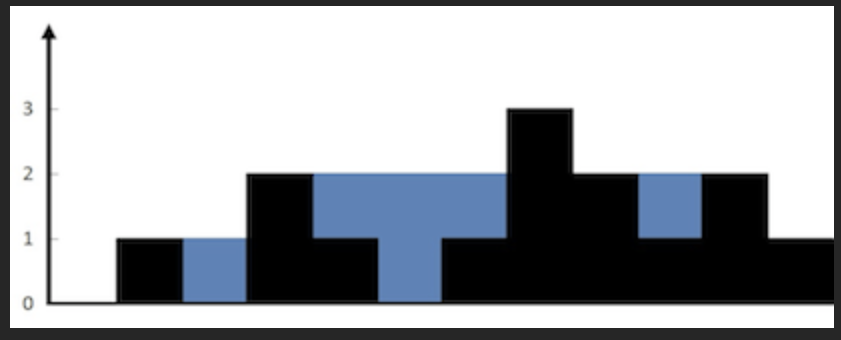

The elevation map depicted above (in the black section) is graphically represented with the x-axis denoting the id and the y-axis representing the heights [0,1,0,2,1,0,1,3,2,1,2,1]. In this scenario, 6 units of rainwater are trapped within the blue section.

**Solution-1:**
``` sql
WITH CTE AS (
    SELECT *,
        MAX(height) OVER(ORDER BY id ASC) AS left_highest_bar,
        MAX(height) OVER(ORDER BY id DESC) AS right_highest_bar
    FROM Heights
)
SELECT SUM(LEAST(left_highest_bar, right_highest_bar) - height) AS total_trapped_water 
-- MIN() get smallest in a column, LEAST() get smallest among X values put in the function
FROM CTE
